In [ ]:
!nvidia-smi

# install YOLOv8

In [ ]:
!pip install ultralytics

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display,Image
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.11.2 torch-2.2.0+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Setup complete  (16 CPUs, 15.4 GB RAM, 201.2/300.0 GB disk)


# Train YOLOv8 model on custom Datast

In [ ]:
# #run only once
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="<your api key> ")
project = rf.workspace("car-detection-mbcmk").project("car-detection-fy9uc")
dataset = project.version(1).download("yolov8")

In [10]:
import torch
print(torch.cuda.is_available())

False


In [5]:
!yolo task=detect mode=train model=yolov8m.pt data="C:\Users\RUTURAJ\Desktop\PROJECTS\cvdl\Car-detection-1\data.yaml" epochs=20 imgsz=640

^C


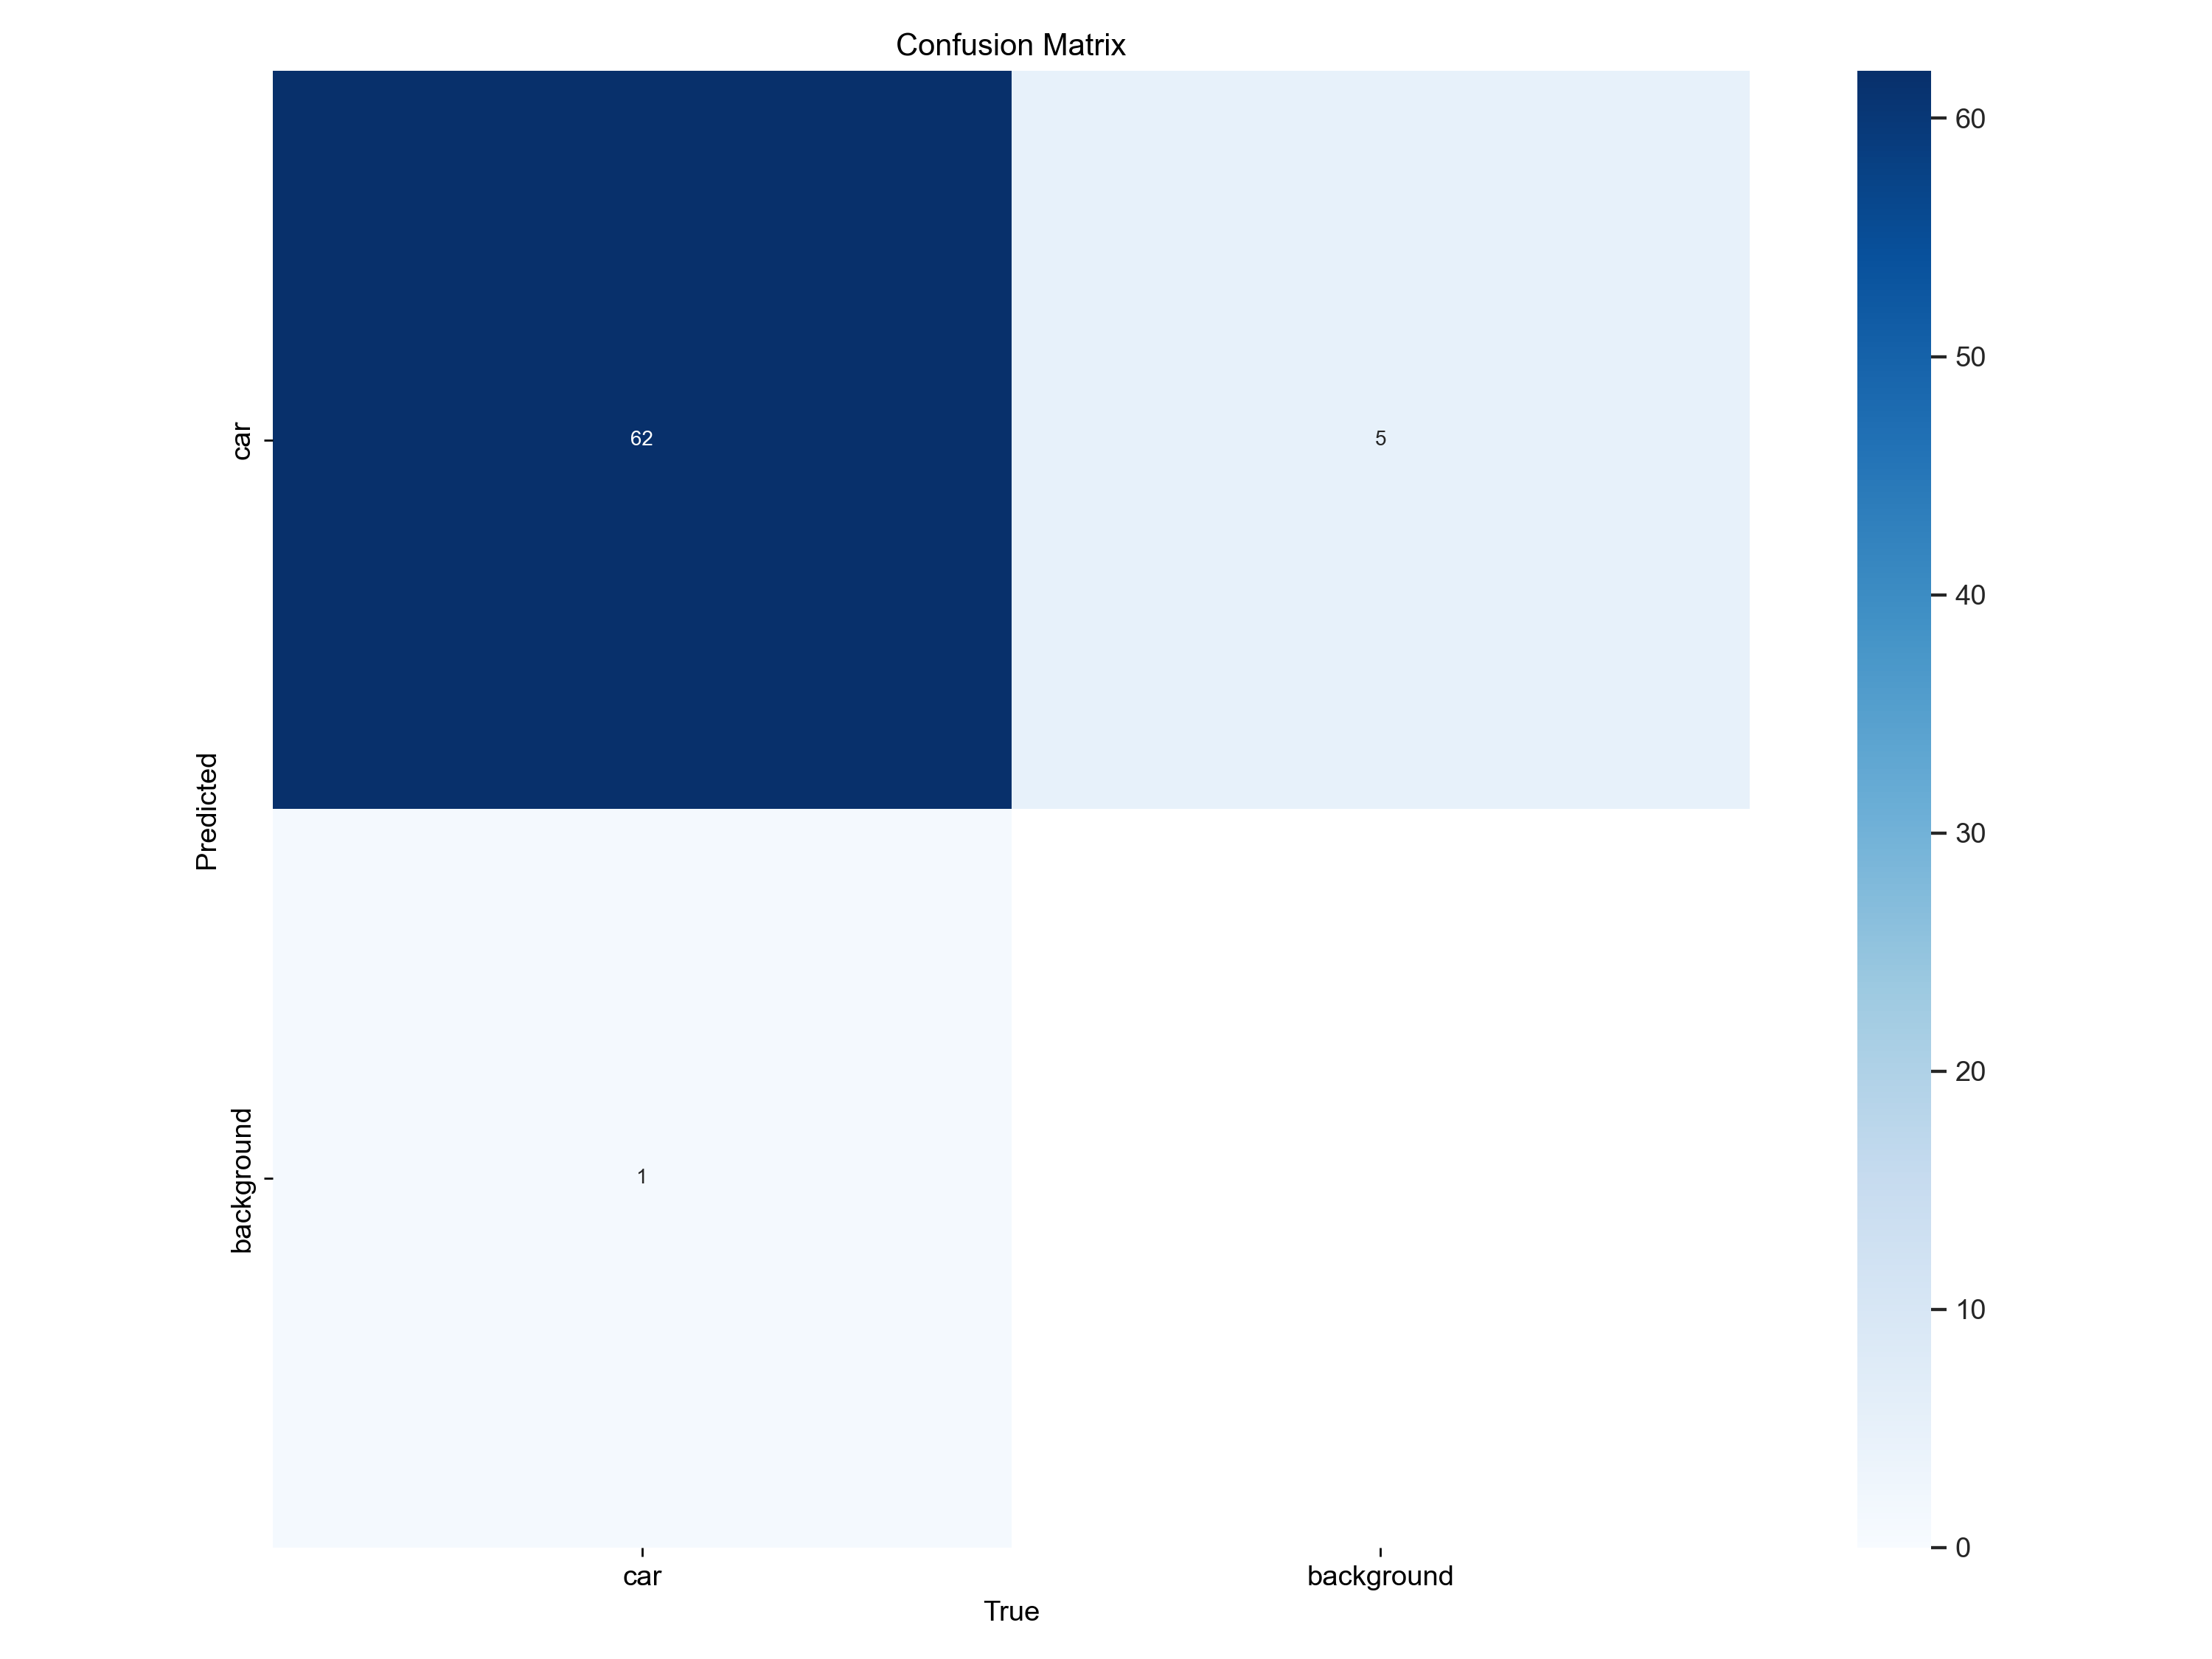

In [15]:
Image(filename=r'C:/Users/RUTURAJ/Desktop/cvdl/runs/detect/train/confusion_matrix.png',width=600)

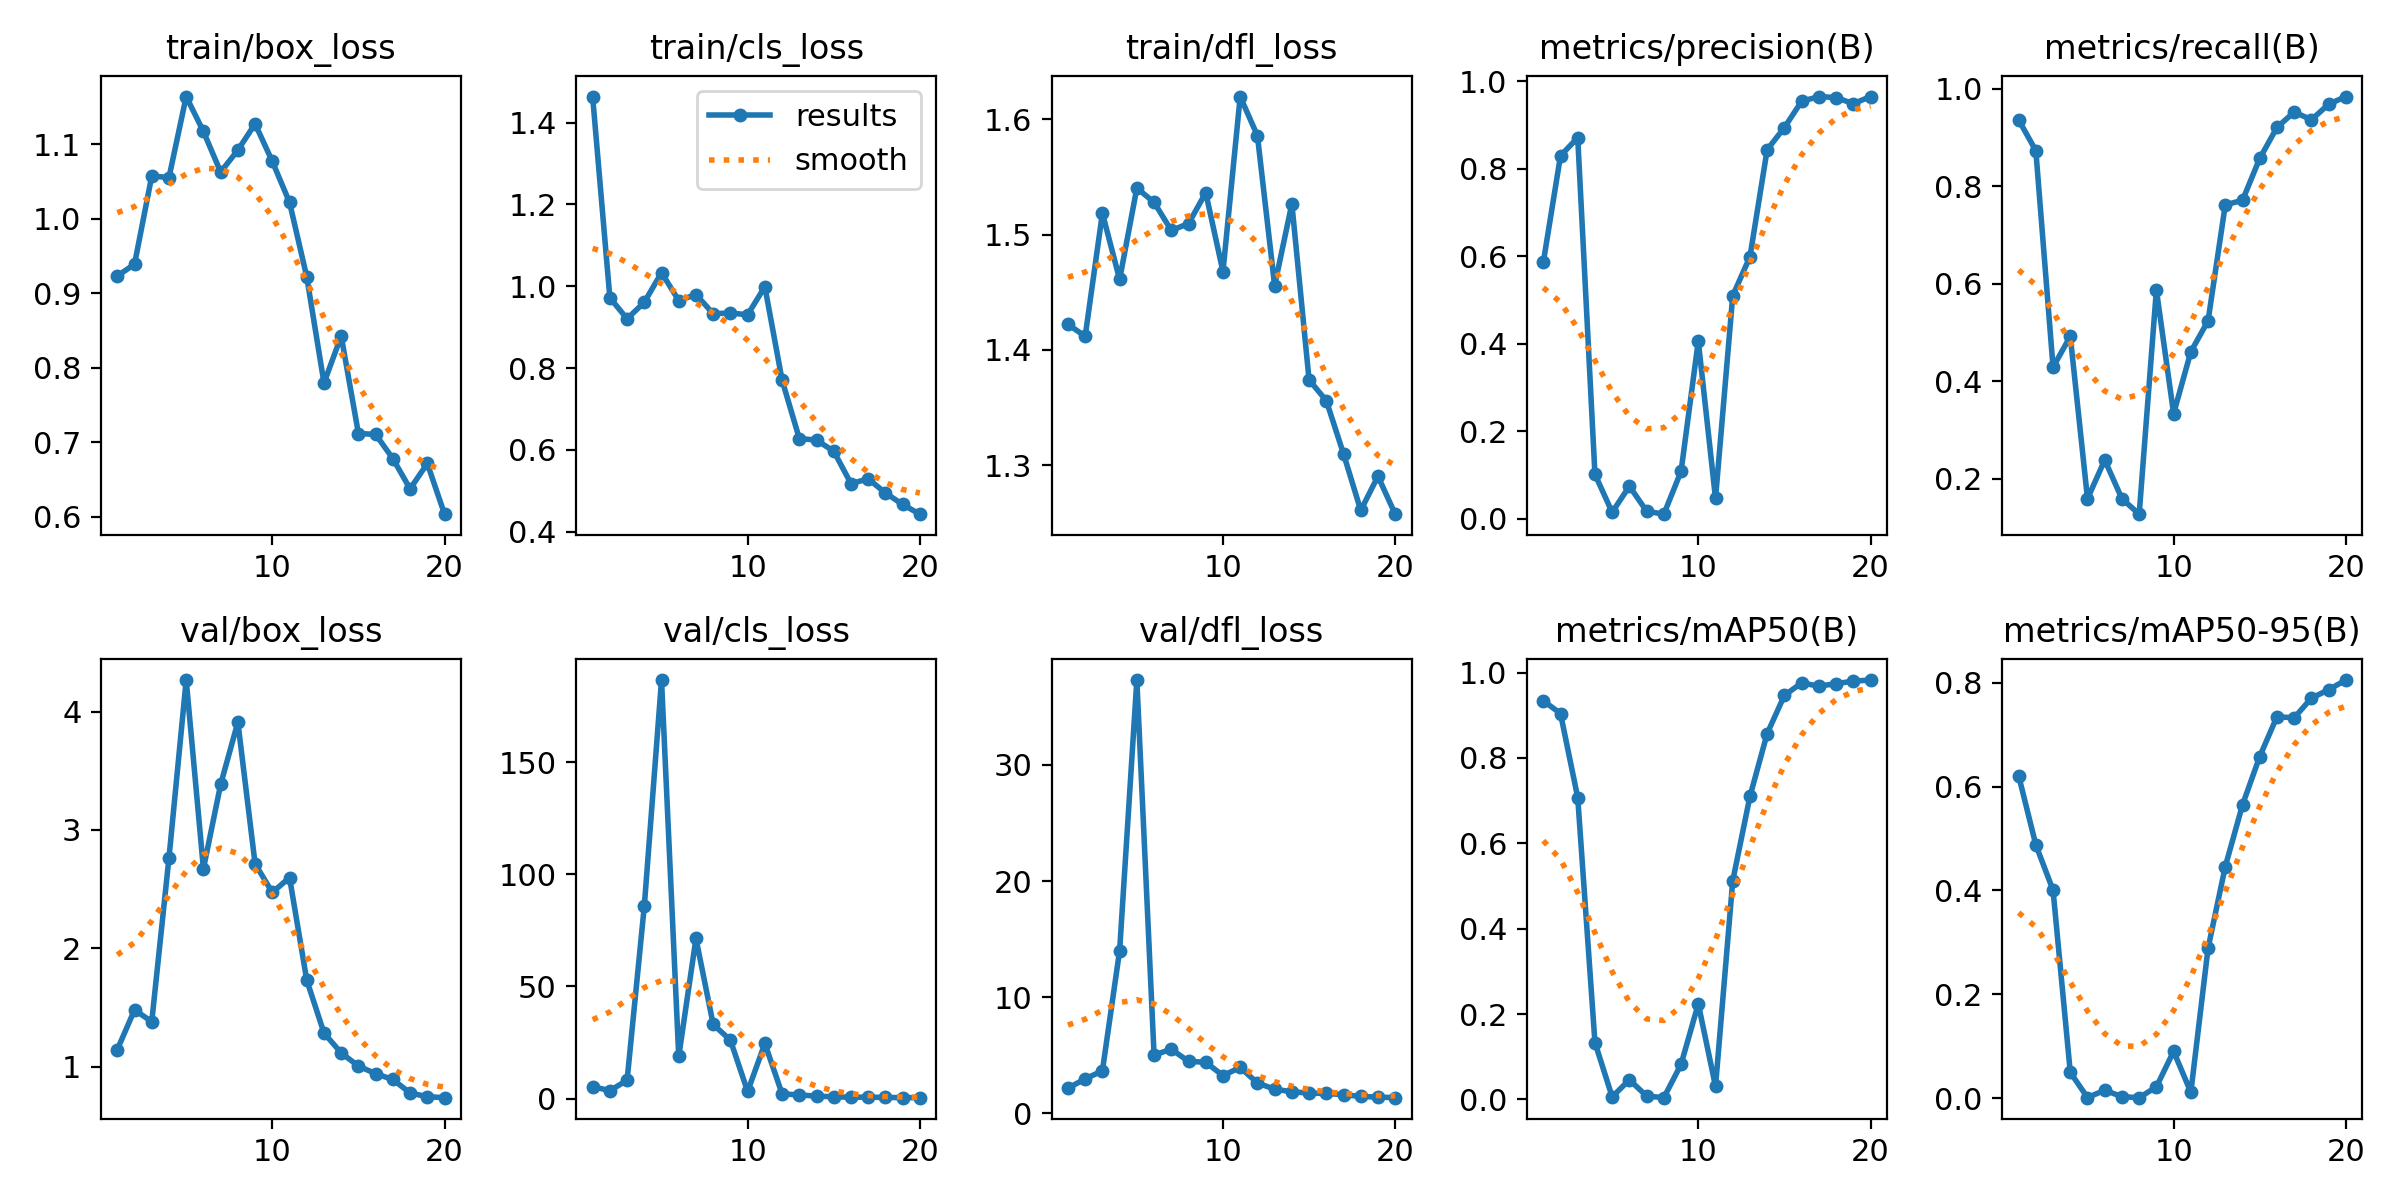

In [16]:
Image(filename=f'C:/Users/RUTURAJ/Desktop/cvdl/runs/detect/train/results.png',width=600)

In [4]:
!yolo task=detect mode=val model="C:\Users\RUTURAJ\Desktop\PROJECTS\cvdl\runs\detect\train\weights\best.pt" data="C:\Users\RUTURAJ\Desktop\PROJECTS\cvdl\Car-detection-1\data.yaml"

Ultralytics YOLOv8.0.196  Python-3.11.2 torch-2.2.0+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

val: Scanning C:\Users\RUTURAJ\Desktop\PROJECTS\cvdl\Car-detection-1\valid\labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
val: Scanning C:\Users\RUTURAJ\Desktop\PROJECTS\cvdl\Car-detection-1\valid\labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
WARNING  Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 63. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-

In [ ]:
!yolo task=detect mode=predict model="C:\Users\RUTURAJ\Desktop\PROJECTS\cvdl\runs\detect\train\weights\best.pt" conf=0.5 source={dataset.location}/test/images

In [ ]:
import glob
from IPython.display import Image , display

for image_path in glob.glob(f'C:/Users/RUTURAJ/Desktop/cvdl/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")

# Prediction


0: 352x640 1 car, 424.0ms
Speed: 8.5ms preprocess, 424.0ms inference, 4.0ms postprocess per image at shape (1, 3, 352, 640)


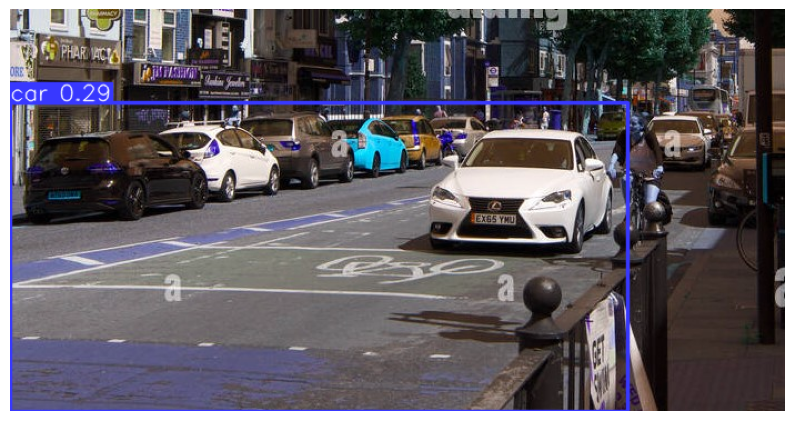

In [1]:
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the YOLO model
model = YOLO('C:/Users/RUTURAJ/Desktop/PROJECTS/cvdl/runs/detect/train/weights/best.pt')
# Path to the image
image_path = "car4.jpg"

# Load the image
image = Image.open(image_path)

# Perform object detection
results = model.predict(image)

# Draw bounding boxes on the original image
annotated_image = image.copy()
for detected_obj in results[0]:
    annotated_image = detected_obj.plot()  # Draw bounding box on the image

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.axis('off')
plt.show()

